In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

%matplotlib inline

tfe.enable_eager_execution(device_policy = tfe.DEVICE_PLACEMENT_SILENT)

In [2]:
from dcgan import DCGAN

In [3]:
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'

In [4]:
noise_dim = 30
output_dim = (28,28,1)

In [5]:
dcgan = DCGAN(noise_dim=noise_dim, output_dim = output_dim, device_name=device, learning_rate=0.0002)

In [6]:
# if you already have pretrained model
# dcgan.load(global_step="latest")

In [7]:
from tensorflow.python.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_val = X_test.astype('float32') / 255.
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

In [9]:
Z = tf.random_normal((1, noise_dim))
dcgan(Z, True)
dcgan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator (Generator)        multiple                  827521    
_________________________________________________________________
discriminator (Discriminator multiple                  79729     
Total params: 907,250
Trainable params: 881,298
Non-trainable params: 25,952
_________________________________________________________________


In [10]:
dcgan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  388864    
_________________________________________________________________
batch_normalization_1 (Batch multiple                  50176     
_________________________________________________________________
reshape (Reshape)            multiple                  0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr multiple                  295040    
_________________________________________________________________
batch_normalization_2 (Batch multiple                  512       
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr multiple                  73792     
_________________________________________________________________
batch_normalization_3 (Batch multiple                  256       
__________

In [11]:
dcgan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  320       
_________________________________________________________________
batch_normalization_5 (Batch multiple                  128       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  18496     
_________________________________________________________________
batch_normalization_6 (Batch multiple                  256       
_________________________________________________________________
conv2d_3 (Conv2D)            multiple                  36928     
_________________________________________________________________
batch_normalization_7 (Batch multiple                  256       
_________________________________________________________________
conv2d_4 (Conv2D)            multiple                  18464     
__________

In [8]:
def randomtest():
    Z = tf.random_normal((10, noise_dim))
    img_test = dcgan.generator(Z, False)
    img_test = img_test.numpy().reshape(-1,28,28)
    img_test = np.concatenate(img_test, axis=1)
            
    plt.imshow(img_test)
    plt.show()

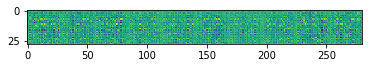

In [9]:
randomtest()

In [10]:
X_train.shape

(60000, 28, 28, 1)

[EPOCH 1 / STEP 1] TRAIN 
TRAIN loss   : 1.4000
GEN   loss   : 0.9777
DIS   loss   : 0.4223
[EPOCH 1 / STEP 1] VAL 
TRAIN loss   : 1.8558
GEN   loss   : 1.6364
DIS   loss   : 0.2194
saved step 1 in checkpoints/
[EPOCH 2 / STEP 2] TRAIN 
TRAIN loss   : 2.5613
GEN   loss   : 2.4556
DIS   loss   : 0.1056
[EPOCH 2 / STEP 2] VAL 
TRAIN loss   : 2.7356
GEN   loss   : 2.6743
DIS   loss   : 0.0612
saved step 2 in checkpoints/
[EPOCH 3 / STEP 3] TRAIN -- Generator only step
TRAIN loss   : 1.6605
GEN   loss   : 0.1327
DIS   loss   : 1.5278
[EPOCH 3 / STEP 3] VAL -- Generator only step
TRAIN loss   : 2.4298
GEN   loss   : 0.0103
DIS   loss   : 2.4194
saved step 3 in checkpoints/
[EPOCH 4 / STEP 4] TRAIN -- Generator only step
TRAIN loss   : 2.6696
GEN   loss   : 0.0058
DIS   loss   : 2.6638
[EPOCH 4 / STEP 4] VAL -- Generator only step
TRAIN loss   : 2.8358
GEN   loss   : 0.0043
DIS   loss   : 2.8314
saved step 4 in checkpoints/
[EPOCH 5 / STEP 5] TRAIN -- Generator only step
TRAIN loss   : 2.946

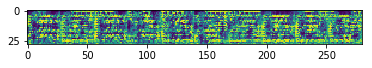

[EPOCH 1 / STEP 6] TRAIN 
TRAIN loss   : 3.3913
GEN   loss   : 3.2985
DIS   loss   : 0.0927
[EPOCH 1 / STEP 6] VAL 
TRAIN loss   : 2.6874
GEN   loss   : 2.1463
DIS   loss   : 0.5411
saved step 6 in checkpoints/
[EPOCH 2 / STEP 7] TRAIN 
TRAIN loss   : 3.2709
GEN   loss   : 3.1503
DIS   loss   : 0.1206
[EPOCH 2 / STEP 7] VAL 
TRAIN loss   : 1.6711
GEN   loss   : 0.1211
DIS   loss   : 1.5500
saved step 7 in checkpoints/
[EPOCH 3 / STEP 8] TRAIN -- Generator only step
TRAIN loss   : 2.2620
GEN   loss   : 0.0244
DIS   loss   : 2.2376
[EPOCH 3 / STEP 8] VAL -- Generator only step
TRAIN loss   : 2.6200
GEN   loss   : 0.0077
DIS   loss   : 2.6122
saved step 8 in checkpoints/
[EPOCH 4 / STEP 9] TRAIN -- Generator only step
TRAIN loss   : 2.7737
GEN   loss   : 0.0051
DIS   loss   : 2.7686
[EPOCH 4 / STEP 9] VAL -- Generator only step
TRAIN loss   : 2.8951
GEN   loss   : 0.0042
DIS   loss   : 2.8909
saved step 9 in checkpoints/
[EPOCH 5 / STEP 10] TRAIN -- Generator only step
TRAIN loss   : 2.98

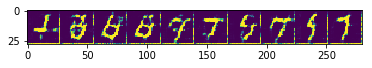

[EPOCH 1 / STEP 11] TRAIN 
TRAIN loss   : 2.6014
GEN   loss   : 2.3473
DIS   loss   : 0.2541
[EPOCH 1 / STEP 11] VAL 
TRAIN loss   : 2.7146
GEN   loss   : 2.0722
DIS   loss   : 0.6425
saved step 11 in checkpoints/
[EPOCH 2 / STEP 12] TRAIN 
TRAIN loss   : 2.5262
GEN   loss   : 2.2789
DIS   loss   : 0.2473
[EPOCH 2 / STEP 12] VAL 
TRAIN loss   : 1.3021
GEN   loss   : 0.2765
DIS   loss   : 1.0256
saved step 12 in checkpoints/
[EPOCH 3 / STEP 13] TRAIN -- Generator only step
TRAIN loss   : 1.9734
GEN   loss   : 0.0563
DIS   loss   : 1.9171
[EPOCH 3 / STEP 13] VAL -- Generator only step
TRAIN loss   : 2.5271
GEN   loss   : 0.0107
DIS   loss   : 2.5164
saved step 13 in checkpoints/
[EPOCH 4 / STEP 14] TRAIN -- Generator only step
TRAIN loss   : 2.7051
GEN   loss   : 0.0064
DIS   loss   : 2.6986
[EPOCH 4 / STEP 14] VAL -- Generator only step
TRAIN loss   : 2.8731
GEN   loss   : 0.0050
DIS   loss   : 2.8681
saved step 14 in checkpoints/
[EPOCH 5 / STEP 15] TRAIN -- Generator only step
TRAIN l

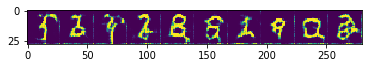

[EPOCH 1 / STEP 16] TRAIN 
TRAIN loss   : 1.9024
GEN   loss   : 1.3824
DIS   loss   : 0.5199
[EPOCH 1 / STEP 16] VAL 
TRAIN loss   : 1.6354
GEN   loss   : 1.1568
DIS   loss   : 0.4787
saved step 16 in checkpoints/
[EPOCH 2 / STEP 17] TRAIN 
TRAIN loss   : 1.9985
GEN   loss   : 1.5862
DIS   loss   : 0.4123
[EPOCH 2 / STEP 17] VAL 
TRAIN loss   : 2.1612
GEN   loss   : 1.5242
DIS   loss   : 0.6370
saved step 17 in checkpoints/
[EPOCH 3 / STEP 18] TRAIN -- Generator only step
TRAIN loss   : 1.9835
GEN   loss   : 0.0600
DIS   loss   : 1.9235
[EPOCH 3 / STEP 18] VAL -- Generator only step
TRAIN loss   : 2.5983
GEN   loss   : 0.0098
DIS   loss   : 2.5885
saved step 18 in checkpoints/
[EPOCH 4 / STEP 19] TRAIN -- Generator only step
TRAIN loss   : 2.7861
GEN   loss   : 0.0060
DIS   loss   : 2.7801
[EPOCH 4 / STEP 19] VAL -- Generator only step
TRAIN loss   : 2.9275
GEN   loss   : 0.0048
DIS   loss   : 2.9227
saved step 19 in checkpoints/
[EPOCH 5 / STEP 20] TRAIN -- Generator only step
TRAIN l

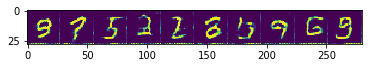

[EPOCH 1 / STEP 21] TRAIN 
TRAIN loss   : 1.7879
GEN   loss   : 1.2617
DIS   loss   : 0.5262
[EPOCH 1 / STEP 21] VAL 
TRAIN loss   : 1.3561
GEN   loss   : 0.2358
DIS   loss   : 1.1203
saved step 21 in checkpoints/
[EPOCH 2 / STEP 22] TRAIN 
TRAIN loss   : 1.8967
GEN   loss   : 1.4484
DIS   loss   : 0.4483
[EPOCH 2 / STEP 22] VAL 
TRAIN loss   : 1.2275
GEN   loss   : 0.3598
DIS   loss   : 0.8677
saved step 22 in checkpoints/
[EPOCH 3 / STEP 23] TRAIN -- Generator only step
TRAIN loss   : 2.0148
GEN   loss   : 0.0380
DIS   loss   : 1.9768
[EPOCH 3 / STEP 23] VAL -- Generator only step
TRAIN loss   : 2.5452
GEN   loss   : 0.0114
DIS   loss   : 2.5338
saved step 23 in checkpoints/
[EPOCH 4 / STEP 24] TRAIN -- Generator only step
TRAIN loss   : 2.7455
GEN   loss   : 0.0068
DIS   loss   : 2.7386
[EPOCH 4 / STEP 24] VAL -- Generator only step
TRAIN loss   : 2.8900
GEN   loss   : 0.0056
DIS   loss   : 2.8844
saved step 24 in checkpoints/
[EPOCH 5 / STEP 25] TRAIN -- Generator only step
TRAIN l

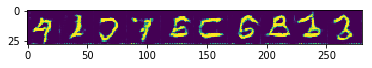

[EPOCH 1 / STEP 26] TRAIN 
TRAIN loss   : 1.7888
GEN   loss   : 1.2322
DIS   loss   : 0.5566
[EPOCH 1 / STEP 26] VAL 
TRAIN loss   : 2.6138
GEN   loss   : 1.7363
DIS   loss   : 0.8775
saved step 26 in checkpoints/
[EPOCH 2 / STEP 27] TRAIN 
TRAIN loss   : 1.8867
GEN   loss   : 1.4629
DIS   loss   : 0.4238
[EPOCH 2 / STEP 27] VAL 
TRAIN loss   : 1.4006
GEN   loss   : 0.7645
DIS   loss   : 0.6362
saved step 27 in checkpoints/
[EPOCH 3 / STEP 28] TRAIN -- Generator only step
TRAIN loss   : 2.0588
GEN   loss   : 0.0514
DIS   loss   : 2.0075
[EPOCH 3 / STEP 28] VAL -- Generator only step
TRAIN loss   : 2.5753
GEN   loss   : 0.0129
DIS   loss   : 2.5624
saved step 28 in checkpoints/
[EPOCH 4 / STEP 29] TRAIN -- Generator only step
TRAIN loss   : 2.7228
GEN   loss   : 0.0086
DIS   loss   : 2.7142
[EPOCH 4 / STEP 29] VAL -- Generator only step
TRAIN loss   : 2.8286
GEN   loss   : 0.0070
DIS   loss   : 2.8215
saved step 29 in checkpoints/
[EPOCH 5 / STEP 30] TRAIN -- Generator only step
TRAIN l

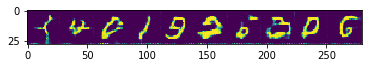

[EPOCH 1 / STEP 31] TRAIN 
TRAIN loss   : 1.8758
GEN   loss   : 1.3717
DIS   loss   : 0.5041
[EPOCH 1 / STEP 31] VAL 
TRAIN loss   : 1.7283
GEN   loss   : 1.0585
DIS   loss   : 0.6698
saved step 31 in checkpoints/
[EPOCH 2 / STEP 32] TRAIN 
TRAIN loss   : 1.8370
GEN   loss   : 1.3830
DIS   loss   : 0.4540
[EPOCH 2 / STEP 32] VAL 
TRAIN loss   : 1.7268
GEN   loss   : 1.1001
DIS   loss   : 0.6267
saved step 32 in checkpoints/
[EPOCH 3 / STEP 33] TRAIN -- Generator only step
TRAIN loss   : 1.6077
GEN   loss   : 0.0608
DIS   loss   : 1.5470
[EPOCH 3 / STEP 33] VAL -- Generator only step
TRAIN loss   : 2.1899
GEN   loss   : 0.0208
DIS   loss   : 2.1692
saved step 33 in checkpoints/
[EPOCH 4 / STEP 34] TRAIN -- Generator only step
TRAIN loss   : 2.3816
GEN   loss   : 0.0128
DIS   loss   : 2.3688
[EPOCH 4 / STEP 34] VAL -- Generator only step
TRAIN loss   : 2.5477
GEN   loss   : 0.0102
DIS   loss   : 2.5375
saved step 34 in checkpoints/
[EPOCH 5 / STEP 35] TRAIN -- Generator only step
TRAIN l

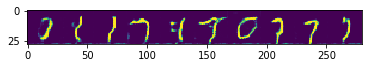

[EPOCH 1 / STEP 36] TRAIN 
TRAIN loss   : 1.7176
GEN   loss   : 1.0982
DIS   loss   : 0.6194
[EPOCH 1 / STEP 36] VAL 
TRAIN loss   : 1.3770
GEN   loss   : 0.6739
DIS   loss   : 0.7031
saved step 36 in checkpoints/
[EPOCH 2 / STEP 37] TRAIN 
TRAIN loss   : 1.7016
GEN   loss   : 1.1452
DIS   loss   : 0.5564
[EPOCH 2 / STEP 37] VAL 
TRAIN loss   : 2.1402
GEN   loss   : 1.3241
DIS   loss   : 0.8161
saved step 37 in checkpoints/
[EPOCH 3 / STEP 38] TRAIN -- Generator only step
TRAIN loss   : 1.4843
GEN   loss   : 0.1019
DIS   loss   : 1.3825
[EPOCH 3 / STEP 38] VAL -- Generator only step
TRAIN loss   : 1.9483
GEN   loss   : 0.0369
DIS   loss   : 1.9114
saved step 38 in checkpoints/
[EPOCH 4 / STEP 39] TRAIN -- Generator only step
TRAIN loss   : 2.1610
GEN   loss   : 0.0208
DIS   loss   : 2.1402
[EPOCH 4 / STEP 39] VAL -- Generator only step
TRAIN loss   : 2.3393
GEN   loss   : 0.0156
DIS   loss   : 2.3237
saved step 39 in checkpoints/
[EPOCH 5 / STEP 40] TRAIN -- Generator only step
TRAIN l

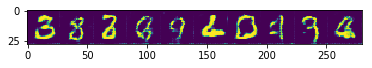

[EPOCH 1 / STEP 41] TRAIN 
TRAIN loss   : 1.6941
GEN   loss   : 1.0995
DIS   loss   : 0.5946
[EPOCH 1 / STEP 41] VAL 
TRAIN loss   : 1.5656
GEN   loss   : 0.9656
DIS   loss   : 0.6000
saved step 41 in checkpoints/
[EPOCH 2 / STEP 42] TRAIN 
TRAIN loss   : 1.7123
GEN   loss   : 1.2000
DIS   loss   : 0.5124
[EPOCH 2 / STEP 42] VAL 
TRAIN loss   : 2.8796
GEN   loss   : 2.0164
DIS   loss   : 0.8632
saved step 42 in checkpoints/
[EPOCH 3 / STEP 43] TRAIN -- Generator only step
TRAIN loss   : 1.5374
GEN   loss   : 0.0717
DIS   loss   : 1.4658
[EPOCH 3 / STEP 43] VAL -- Generator only step
TRAIN loss   : 2.2040
GEN   loss   : 0.0239
DIS   loss   : 2.1801
saved step 43 in checkpoints/
[EPOCH 4 / STEP 44] TRAIN -- Generator only step
TRAIN loss   : 2.4087
GEN   loss   : 0.0139
DIS   loss   : 2.3948
[EPOCH 4 / STEP 44] VAL -- Generator only step
TRAIN loss   : 2.5730
GEN   loss   : 0.0111
DIS   loss   : 2.5619
saved step 44 in checkpoints/
[EPOCH 5 / STEP 45] TRAIN -- Generator only step
TRAIN l

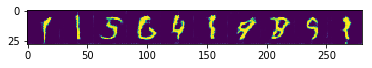

[EPOCH 1 / STEP 46] TRAIN 
TRAIN loss   : 1.6596
GEN   loss   : 1.0449
DIS   loss   : 0.6147
[EPOCH 1 / STEP 46] VAL 
TRAIN loss   : 1.3141
GEN   loss   : 0.6286
DIS   loss   : 0.6855
saved step 46 in checkpoints/
[EPOCH 2 / STEP 47] TRAIN 
TRAIN loss   : 1.7407
GEN   loss   : 1.2394
DIS   loss   : 0.5014
[EPOCH 2 / STEP 47] VAL 
TRAIN loss   : 1.3549
GEN   loss   : 0.7268
DIS   loss   : 0.6280
saved step 47 in checkpoints/
[EPOCH 3 / STEP 48] TRAIN -- Generator only step
TRAIN loss   : 1.7132
GEN   loss   : 0.0592
DIS   loss   : 1.6540
[EPOCH 3 / STEP 48] VAL -- Generator only step
TRAIN loss   : 2.2466
GEN   loss   : 0.0180
DIS   loss   : 2.2285
saved step 48 in checkpoints/
[EPOCH 4 / STEP 49] TRAIN -- Generator only step
TRAIN loss   : 2.4383
GEN   loss   : 0.0110
DIS   loss   : 2.4273
[EPOCH 4 / STEP 49] VAL -- Generator only step
TRAIN loss   : 2.5925
GEN   loss   : 0.0089
DIS   loss   : 2.5835
saved step 49 in checkpoints/
[EPOCH 5 / STEP 50] TRAIN -- Generator only step
TRAIN l

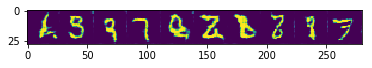

[EPOCH 1 / STEP 51] TRAIN 
TRAIN loss   : 1.6318
GEN   loss   : 0.9801
DIS   loss   : 0.6517
[EPOCH 1 / STEP 51] VAL 
TRAIN loss   : 1.2278
GEN   loss   : 0.4761
DIS   loss   : 0.7517
saved step 51 in checkpoints/
[EPOCH 2 / STEP 52] TRAIN 
TRAIN loss   : 1.6194
GEN   loss   : 1.0704
DIS   loss   : 0.5490
[EPOCH 2 / STEP 52] VAL 
TRAIN loss   : 1.6564
GEN   loss   : 1.0104
DIS   loss   : 0.6461
saved step 52 in checkpoints/
[EPOCH 3 / STEP 53] TRAIN -- Generator only step
TRAIN loss   : 1.5767
GEN   loss   : 0.0651
DIS   loss   : 1.5117
[EPOCH 3 / STEP 53] VAL -- Generator only step
TRAIN loss   : 2.1201
GEN   loss   : 0.0216
DIS   loss   : 2.0985
saved step 53 in checkpoints/
[EPOCH 4 / STEP 54] TRAIN -- Generator only step
TRAIN loss   : 2.3356
GEN   loss   : 0.0122
DIS   loss   : 2.3234
[EPOCH 4 / STEP 54] VAL -- Generator only step
TRAIN loss   : 2.5055
GEN   loss   : 0.0097
DIS   loss   : 2.4958
saved step 54 in checkpoints/
[EPOCH 5 / STEP 55] TRAIN -- Generator only step
TRAIN l

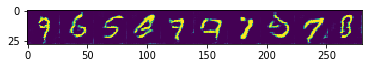

[EPOCH 1 / STEP 56] TRAIN 
TRAIN loss   : 1.7388
GEN   loss   : 1.1401
DIS   loss   : 0.5986
[EPOCH 1 / STEP 56] VAL 
TRAIN loss   : 1.5074
GEN   loss   : 0.8176
DIS   loss   : 0.6898
saved step 56 in checkpoints/
[EPOCH 2 / STEP 57] TRAIN 
TRAIN loss   : 1.7288
GEN   loss   : 1.2336
DIS   loss   : 0.4952
[EPOCH 2 / STEP 57] VAL 
TRAIN loss   : 3.4744
GEN   loss   : 2.4498
DIS   loss   : 1.0245
saved step 57 in checkpoints/
[EPOCH 3 / STEP 58] TRAIN -- Generator only step
TRAIN loss   : 1.5697
GEN   loss   : 0.0621
DIS   loss   : 1.5075
[EPOCH 3 / STEP 58] VAL -- Generator only step
TRAIN loss   : 2.1695
GEN   loss   : 0.0208
DIS   loss   : 2.1486
saved step 58 in checkpoints/
[EPOCH 4 / STEP 59] TRAIN -- Generator only step
TRAIN loss   : 2.3870
GEN   loss   : 0.0115
DIS   loss   : 2.3755
[EPOCH 4 / STEP 59] VAL -- Generator only step
TRAIN loss   : 2.5525
GEN   loss   : 0.0092
DIS   loss   : 2.5433
saved step 59 in checkpoints/
[EPOCH 5 / STEP 60] TRAIN -- Generator only step
TRAIN l

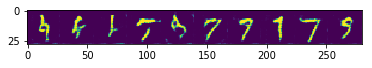

[EPOCH 1 / STEP 61] TRAIN 
TRAIN loss   : 1.6319
GEN   loss   : 1.0051
DIS   loss   : 0.6268
[EPOCH 1 / STEP 61] VAL 
TRAIN loss   : 1.9506
GEN   loss   : 1.2753
DIS   loss   : 0.6754
saved step 61 in checkpoints/
[EPOCH 2 / STEP 62] TRAIN 
TRAIN loss   : 1.6707
GEN   loss   : 1.1201
DIS   loss   : 0.5506
[EPOCH 2 / STEP 62] VAL 
TRAIN loss   : 1.2346
GEN   loss   : 0.4275
DIS   loss   : 0.8071
saved step 62 in checkpoints/
[EPOCH 3 / STEP 63] TRAIN -- Generator only step
TRAIN loss   : 1.4552
GEN   loss   : 0.1127
DIS   loss   : 1.3425
[EPOCH 3 / STEP 63] VAL -- Generator only step
TRAIN loss   : 1.8351
GEN   loss   : 0.0409
DIS   loss   : 1.7943
saved step 63 in checkpoints/
[EPOCH 4 / STEP 64] TRAIN -- Generator only step
TRAIN loss   : 2.0300
GEN   loss   : 0.0237
DIS   loss   : 2.0063
[EPOCH 4 / STEP 64] VAL -- Generator only step
TRAIN loss   : 2.1973
GEN   loss   : 0.0185
DIS   loss   : 2.1788
saved step 64 in checkpoints/
[EPOCH 5 / STEP 65] TRAIN -- Generator only step
TRAIN l

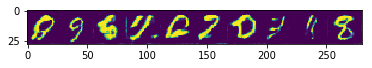

[EPOCH 1 / STEP 66] TRAIN 
TRAIN loss   : 1.7295
GEN   loss   : 1.1426
DIS   loss   : 0.5869
[EPOCH 1 / STEP 66] VAL 
TRAIN loss   : 1.9746
GEN   loss   : 1.2710
DIS   loss   : 0.7036
saved step 66 in checkpoints/
[EPOCH 2 / STEP 67] TRAIN 
TRAIN loss   : 1.7078
GEN   loss   : 1.1626
DIS   loss   : 0.5452
[EPOCH 2 / STEP 67] VAL 
TRAIN loss   : 1.4659
GEN   loss   : 0.7876
DIS   loss   : 0.6783
saved step 67 in checkpoints/
[EPOCH 3 / STEP 68] TRAIN -- Generator only step
TRAIN loss   : 1.5960
GEN   loss   : 0.0674
DIS   loss   : 1.5286
[EPOCH 3 / STEP 68] VAL -- Generator only step
TRAIN loss   : 2.1174
GEN   loss   : 0.0227
DIS   loss   : 2.0947
saved step 68 in checkpoints/
[EPOCH 4 / STEP 69] TRAIN -- Generator only step
TRAIN loss   : 2.3198
GEN   loss   : 0.0134
DIS   loss   : 2.3064
[EPOCH 4 / STEP 69] VAL -- Generator only step
TRAIN loss   : 2.4746
GEN   loss   : 0.0105
DIS   loss   : 2.4640
saved step 69 in checkpoints/
[EPOCH 5 / STEP 70] TRAIN -- Generator only step
TRAIN l

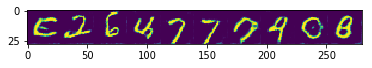

[EPOCH 1 / STEP 71] TRAIN 
TRAIN loss   : 1.6356
GEN   loss   : 1.0070
DIS   loss   : 0.6286
[EPOCH 1 / STEP 71] VAL 
TRAIN loss   : 2.2786
GEN   loss   : 1.5246
DIS   loss   : 0.7541
saved step 71 in checkpoints/
[EPOCH 2 / STEP 72] TRAIN 
TRAIN loss   : 1.6953
GEN   loss   : 1.1816
DIS   loss   : 0.5137
[EPOCH 2 / STEP 72] VAL 
TRAIN loss   : 1.8008
GEN   loss   : 1.1701
DIS   loss   : 0.6307
saved step 72 in checkpoints/
[EPOCH 3 / STEP 73] TRAIN -- Generator only step
TRAIN loss   : 1.4230
GEN   loss   : 0.0997
DIS   loss   : 1.3233
[EPOCH 3 / STEP 73] VAL -- Generator only step
TRAIN loss   : 1.9315
GEN   loss   : 0.0328
DIS   loss   : 1.8987
saved step 73 in checkpoints/
[EPOCH 4 / STEP 74] TRAIN -- Generator only step
TRAIN loss   : 2.1552
GEN   loss   : 0.0178
DIS   loss   : 2.1373
[EPOCH 4 / STEP 74] VAL -- Generator only step
TRAIN loss   : 2.3280
GEN   loss   : 0.0138
DIS   loss   : 2.3142
saved step 74 in checkpoints/
[EPOCH 5 / STEP 75] TRAIN -- Generator only step
TRAIN l

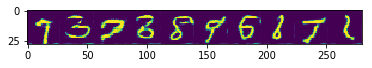

[EPOCH 1 / STEP 76] TRAIN 
TRAIN loss   : 1.7213
GEN   loss   : 1.1594
DIS   loss   : 0.5619
[EPOCH 1 / STEP 76] VAL 
TRAIN loss   : 1.7034
GEN   loss   : 0.9773
DIS   loss   : 0.7261
saved step 76 in checkpoints/
[EPOCH 2 / STEP 77] TRAIN 
TRAIN loss   : 1.7030
GEN   loss   : 1.1513
DIS   loss   : 0.5516
[EPOCH 2 / STEP 77] VAL 
TRAIN loss   : 1.4384
GEN   loss   : 0.7958
DIS   loss   : 0.6426
saved step 77 in checkpoints/
[EPOCH 3 / STEP 78] TRAIN -- Generator only step
TRAIN loss   : 1.5680
GEN   loss   : 0.0809
DIS   loss   : 1.4871
[EPOCH 3 / STEP 78] VAL -- Generator only step
TRAIN loss   : 2.1204
GEN   loss   : 0.0249
DIS   loss   : 2.0955
saved step 78 in checkpoints/
[EPOCH 4 / STEP 79] TRAIN -- Generator only step
TRAIN loss   : 2.3259
GEN   loss   : 0.0143
DIS   loss   : 2.3116
[EPOCH 4 / STEP 79] VAL -- Generator only step
TRAIN loss   : 2.4946
GEN   loss   : 0.0115
DIS   loss   : 2.4831
saved step 79 in checkpoints/
[EPOCH 5 / STEP 80] TRAIN -- Generator only step
TRAIN l

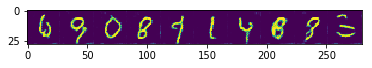

[EPOCH 1 / STEP 81] TRAIN 
TRAIN loss   : 1.7053
GEN   loss   : 1.1182
DIS   loss   : 0.5871
[EPOCH 1 / STEP 81] VAL 
TRAIN loss   : 2.6565
GEN   loss   : 1.7591
DIS   loss   : 0.8975
saved step 81 in checkpoints/
[EPOCH 2 / STEP 82] TRAIN 
TRAIN loss   : 1.7488
GEN   loss   : 1.2638
DIS   loss   : 0.4850
[EPOCH 2 / STEP 82] VAL 
TRAIN loss   : 1.5789
GEN   loss   : 0.9660
DIS   loss   : 0.6129
saved step 82 in checkpoints/
[EPOCH 3 / STEP 83] TRAIN -- Generator only step
TRAIN loss   : 1.4476
GEN   loss   : 0.1068
DIS   loss   : 1.3407
[EPOCH 3 / STEP 83] VAL -- Generator only step
TRAIN loss   : 1.8947
GEN   loss   : 0.0436
DIS   loss   : 1.8512
saved step 83 in checkpoints/
[EPOCH 4 / STEP 84] TRAIN -- Generator only step
TRAIN loss   : 2.1016
GEN   loss   : 0.0256
DIS   loss   : 2.0761
[EPOCH 4 / STEP 84] VAL -- Generator only step
TRAIN loss   : 2.2735
GEN   loss   : 0.0196
DIS   loss   : 2.2539
saved step 84 in checkpoints/
[EPOCH 5 / STEP 85] TRAIN -- Generator only step
TRAIN l

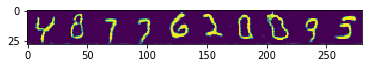

[EPOCH 1 / STEP 86] TRAIN 
TRAIN loss   : 1.6244
GEN   loss   : 1.0179
DIS   loss   : 0.6065
[EPOCH 1 / STEP 86] VAL 
TRAIN loss   : 1.3480
GEN   loss   : 0.6567
DIS   loss   : 0.6913
saved step 86 in checkpoints/
[EPOCH 2 / STEP 87] TRAIN 
TRAIN loss   : 1.7183
GEN   loss   : 1.2053
DIS   loss   : 0.5130
[EPOCH 2 / STEP 87] VAL 
TRAIN loss   : 1.3019
GEN   loss   : 0.5946
DIS   loss   : 0.7073
saved step 87 in checkpoints/
[EPOCH 3 / STEP 88] TRAIN -- Generator only step
TRAIN loss   : 1.8148
GEN   loss   : 0.0344
DIS   loss   : 1.7804
[EPOCH 3 / STEP 88] VAL -- Generator only step
TRAIN loss   : 2.3500
GEN   loss   : 0.0158
DIS   loss   : 2.3342
saved step 88 in checkpoints/
[EPOCH 4 / STEP 89] TRAIN -- Generator only step
TRAIN loss   : 2.5396
GEN   loss   : 0.0094
DIS   loss   : 2.5302
[EPOCH 4 / STEP 89] VAL -- Generator only step
TRAIN loss   : 2.6863
GEN   loss   : 0.0076
DIS   loss   : 2.6787
saved step 89 in checkpoints/
[EPOCH 5 / STEP 90] TRAIN -- Generator only step
TRAIN l

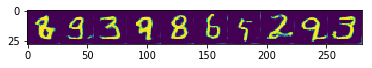

[EPOCH 1 / STEP 91] TRAIN 
TRAIN loss   : 1.6685
GEN   loss   : 1.0919
DIS   loss   : 0.5766
[EPOCH 1 / STEP 91] VAL 
TRAIN loss   : 2.4164
GEN   loss   : 1.7356
DIS   loss   : 0.6808
saved step 91 in checkpoints/
[EPOCH 2 / STEP 92] TRAIN 
TRAIN loss   : 1.6675
GEN   loss   : 1.1338
DIS   loss   : 0.5337
[EPOCH 2 / STEP 92] VAL 
TRAIN loss   : 2.0613
GEN   loss   : 1.3284
DIS   loss   : 0.7328
saved step 92 in checkpoints/
[EPOCH 3 / STEP 93] TRAIN -- Generator only step
TRAIN loss   : 1.3522
GEN   loss   : 0.1263
DIS   loss   : 1.2259
[EPOCH 3 / STEP 93] VAL -- Generator only step
TRAIN loss   : 1.8186
GEN   loss   : 0.0397
DIS   loss   : 1.7788
saved step 93 in checkpoints/
[EPOCH 4 / STEP 94] TRAIN -- Generator only step
TRAIN loss   : 2.0263
GEN   loss   : 0.0220
DIS   loss   : 2.0043
[EPOCH 4 / STEP 94] VAL -- Generator only step
TRAIN loss   : 2.1963
GEN   loss   : 0.0175
DIS   loss   : 2.1787
saved step 94 in checkpoints/
[EPOCH 5 / STEP 95] TRAIN -- Generator only step
TRAIN l

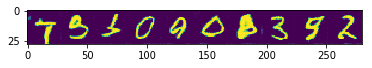

[EPOCH 1 / STEP 96] TRAIN 
TRAIN loss   : 1.6652
GEN   loss   : 1.0943
DIS   loss   : 0.5709
[EPOCH 1 / STEP 96] VAL 
TRAIN loss   : 1.5333
GEN   loss   : 0.8505
DIS   loss   : 0.6828
saved step 96 in checkpoints/
[EPOCH 2 / STEP 97] TRAIN 
TRAIN loss   : 1.6543
GEN   loss   : 1.1291
DIS   loss   : 0.5252
[EPOCH 2 / STEP 97] VAL 
TRAIN loss   : 2.2486
GEN   loss   : 1.4755
DIS   loss   : 0.7731
saved step 97 in checkpoints/
[EPOCH 3 / STEP 98] TRAIN -- Generator only step
TRAIN loss   : 1.4709
GEN   loss   : 0.0866
DIS   loss   : 1.3843
[EPOCH 3 / STEP 98] VAL -- Generator only step
TRAIN loss   : 2.0098
GEN   loss   : 0.0303
DIS   loss   : 1.9795
saved step 98 in checkpoints/
[EPOCH 4 / STEP 99] TRAIN -- Generator only step
TRAIN loss   : 2.2213
GEN   loss   : 0.0171
DIS   loss   : 2.2041
[EPOCH 4 / STEP 99] VAL -- Generator only step
TRAIN loss   : 2.3798
GEN   loss   : 0.0139
DIS   loss   : 2.3659
saved step 99 in checkpoints/
[EPOCH 5 / STEP 100] TRAIN -- Generator only step
TRAIN 

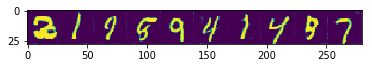

In [11]:
# if you want to train
for i in range(20):
    dcgan.fit(X_train, X_val, saving=True, epochs=5, both_step=2, gen_step=3, batch_size=128, verbose=1)
    randomtest()